<a href="https://www.kaggle.com/jy2040/preprocessing-eda-feature-transformation?scriptVersionId=86910275" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Objecive

The goal is to create model(s) to predict building energy consumption. The dataset consists of building characteristics and climate and weather variables for the regions in which the buildings are located. Accurate predictions of energy consumption can help policymakers target retrofitting efforts to maximize emissions reductions. The dataset was created in collaboration with Climate Change AI (CCAI) and Lawrence Berkeley National Laboratory (Berkeley Lab)

### Data Description
The dataset consists of building characteristics (e.g. floor area, facility type etc), weather data for the location of the building (e.g. annual average temperature, annual total precipitation etc) as well as the energy usage for the building and the given year, measured as Site Energy Usage Intensity (Site EUI). Each row in the data corresponds to the a single building observed in a given year. 

The eventual objective is to predict the Site EUI for each row as a function of the building features and the weather data for the location of the building. Your task for this asignment is to <b>perform data processing, EDA and necessary feature transformation<b> that would set you up for prediction.


### Data Dictionary

**id**: building id

**Year_Factor**: anonymized year in which the weather and energy usage factors were observed

**State_Factor**: anonymized state in which the building is located

**building_class**: building classification

**facility_type**: building usage type

**floor_area**: floor area (in square feet) of the building

**year_built**: year in which the building was constructed

**energy_star_rating**: the energy star rating of the building

**ELEVATION**: elevation of the building location

**january_min_temp**: minimum temperature in January (in Fahrenheit) at the location of the building

**january_avg_temp**: average temperature in January (in Fahrenheit) at the location of the building

**january_max_temp**: maximum temperature in January (in Fahrenheit) at the location of the building

**cooling_degree_days**: cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

**heating_degree_days**: heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

**precipitation_inches**: annual precipitation in inches at the location of the building

**snowfall_inches**: annual snowfall in inches at the location of the building

**snowdepth_inches**: annual snow depth in inches at the location of the building

**avg_temp**: average temperature over a year at the location of the building

**days_below_30F**: total number of days below 30 degrees Fahrenheit at the location of the building

**days_below_20F**: total number of days below 20 degrees Fahrenheit at the location of the building

**days_below_10F**: total number of days below 10 degrees Fahrenheit at the location of the building

**days_below_0F**: total number of days below 0 degrees Fahrenheit at the location of the building

**days_above_80F**: total number of days above 80 degrees Fahrenheit at the location of the building

**days_above_90F**: total number of days above 90 degrees Fahrenheit at the location of the building

**days_above_100F**: total number of days above 100 degrees Fahrenheit at the location of the building

**days_above_110F**: total number of days above 110 degrees Fahrenheit at the location of the building

**direction_max_wind_speed**: wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

**direction_peak_wind_speed**: wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

**max_wind_speed**: maximum wind speed at the location of the building

**days_with_fog**: number of days with fog at the location of the building

#### Target
**site_eui**: Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills

Source: WiDS Datathon 2022

In [1]:
# This piece of code enables display of multiple output from one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### Importing the usefull libraries

* Numpy
* Pandas

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Understanding Data (Review)

* Understand distributions
* Trends
* Relationships
* Patterns

## <b>EDA on Training Data</b>

In [3]:
data = pd.read_csv("../input/widsdatathon22/train.csv")
print("Type of the data after reading it : ", type(data))
print("Dimension of the Data : " , data.shape)

Type of the data after reading it :  <class 'pandas.core.frame.DataFrame'>
Dimension of the Data :  (75757, 64)


#### Feature names in data

In [4]:
#to desplay all the rows(which columns of out main data)
pd.set_option('display.max_rows', data.shape[1]+1)
print("List of the features with it's datatype\n")
data.dtypes

List of the features with it's datatype



Year_Factor                    int64
State_Factor                  object
building_class                object
facility_type                 object
floor_area                   float64
year_built                   float64
energy_star_rating           float64
ELEVATION                    float64
january_min_temp               int64
january_avg_temp             float64
january_max_temp               int64
february_min_temp              int64
february_avg_temp            float64
february_max_temp              int64
march_min_temp                 int64
march_avg_temp               float64
march_max_temp                 int64
april_min_temp                 int64
april_avg_temp               float64
april_max_temp                 int64
may_min_temp                   int64
may_avg_temp                 float64
may_max_temp                   int64
june_min_temp                  int64
june_avg_temp                float64
june_max_temp                  int64
july_min_temp                  int64
j

#### Let's first check for the stats of the features
* <b>Note</b> The default describe() won't return the stats of object datatype.

In [5]:
#checking the stats of the numeric dtype features
data.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


#### Destribution of the missing values in data

In [6]:
#these both code gives the same output
(data.isnull().sum() / data.shape[0]) * 100
# data.isna().sum()

Year_Factor                   0.000000
State_Factor                  0.000000
building_class                0.000000
facility_type                 0.000000
floor_area                    0.000000
year_built                    2.424858
energy_star_rating           35.256148
ELEVATION                     0.000000
january_min_temp              0.000000
january_avg_temp              0.000000
january_max_temp              0.000000
february_min_temp             0.000000
february_avg_temp             0.000000
february_max_temp             0.000000
march_min_temp                0.000000
march_avg_temp                0.000000
march_max_temp                0.000000
april_min_temp                0.000000
april_avg_temp                0.000000
april_max_temp                0.000000
may_min_temp                  0.000000
may_avg_temp                  0.000000
may_max_temp                  0.000000
june_min_temp                 0.000000
june_avg_temp                 0.000000
june_max_temp            

#### Let's check the destribution of the target variable (i.e., site_eui)

Data type of the site_eui :  float64
Stats for site_eui variable.


count    75757.000000
mean        82.584693
std         58.255403
min          1.001169
25%         54.528601
50%         75.293716
75%         97.277534
max        997.866120
Name: site_eui, dtype: float64

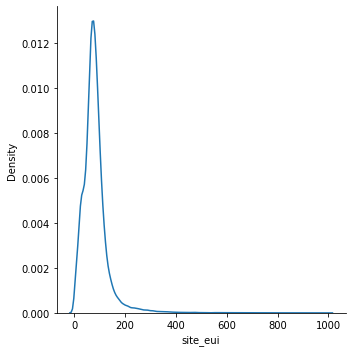

In [7]:
# from the above output, we can see that there are no missing values in site_eui variable
print("Data type of the site_eui : ",data["site_eui"].dtype)
print("Stats for site_eui variable.")
data['site_eui'].describe()

#let's plot the sit_eui values to check the destribution of it
sns.displot(data, x="site_eui", kind="kde")

#### Let's have a look at Object datatype varibles

In [8]:
print("Features which has the object datatype.\n",data.select_dtypes(include = "object").head())
State_Factor = data.State_Factor.unique().tolist()
building_class = data.building_class.unique().tolist()
facility_type = data.facility_type.unique().tolist()
print("State_Factor variable has " , len(State_Factor), " unique values")
print("building_class variable has " , len(building_class), " unique values")
print("facility_type variable has " , len(facility_type), " unique values")

Features which has the object datatype.
   State_Factor building_class                              facility_type
0      State_1     Commercial               Grocery_store_or_food_market
1      State_1     Commercial  Warehouse_Distribution_or_Shipping_center
2      State_1     Commercial                       Retail_Enclosed_mall
3      State_1     Commercial                  Education_Other_classroom
4      State_1     Commercial                  Warehouse_Nonrefrigerated
State_Factor variable has  7  unique values
building_class variable has  2  unique values
facility_type variable has  60  unique values


#### Correlation Plot

<AxesSubplot:>

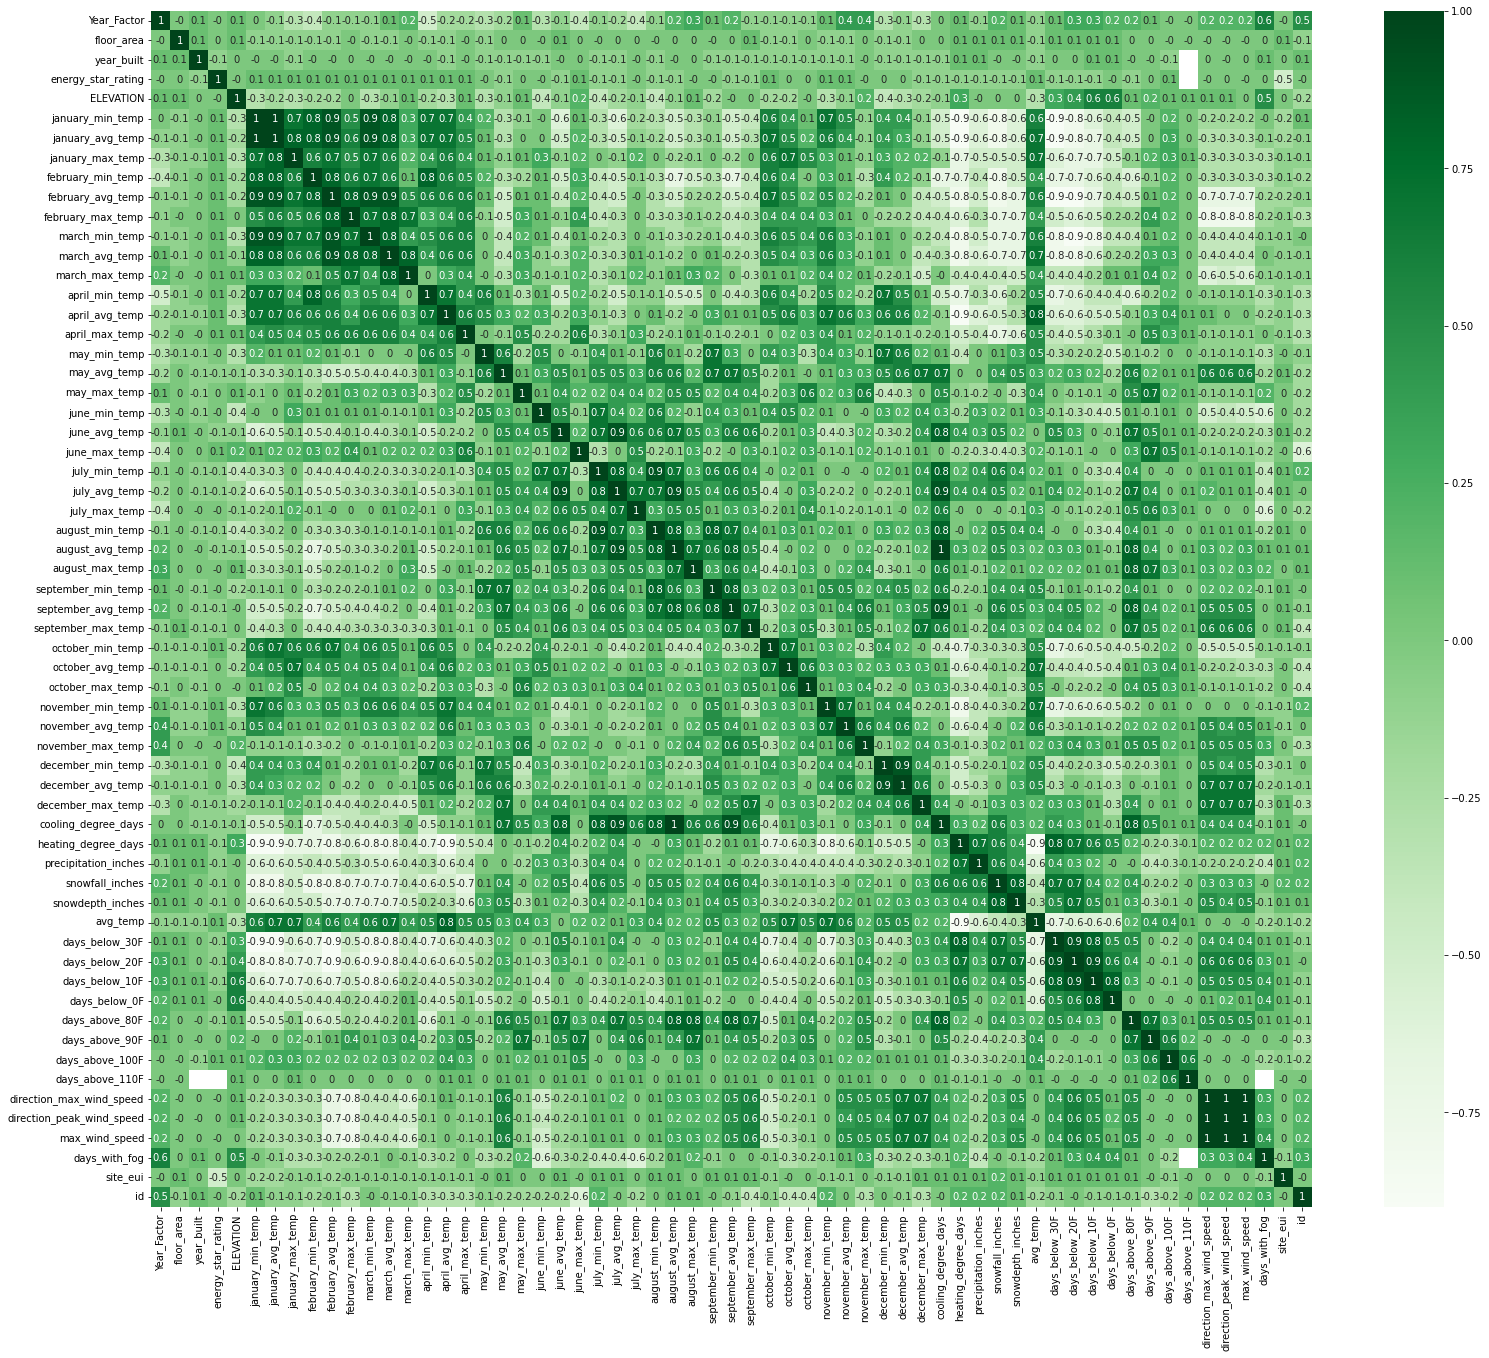

In [9]:
corr = data.corr().round(1)
fig, ax = plt.subplots()
fig.set_size_inches(26, 22)
sns.heatmap(corr,annot = True,cmap = "Greens")

## <b>Summary of EDA</b>
* #### <b>Variables</b>
<ul>
    <li>Object datatype variables: There are total <b>3</b> variables with <b>Object</b> datatype</li>
    <li>Numeric datatype variables: <b>Total 61</b> with numeric datatype</li>
</ul>

* #### <b>Missing Values</b>
<p>There are total <b>6 variables </b> having missing values out of which, <b>4 variable</b> has more than <b>54%</b> of missing values</p>
<p> The rest <b>2 variables (year_built, energy_star_rating) has comparatively less missing values</b></p>



## <b>Handling missing Values</b>
* First remove the variable having more than 50% of the missing values
* Handle missing values of rest of the variables (i.e.,year_built, energy_star_rating)

In [10]:
import copy
newData = copy.deepcopy(data)
newData = newData.drop(['direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed','days_with_fog'] , axis = 1)
newData.shape

(75757, 60)

In [11]:
newData['year_built'].describe()
print("Instances having missing values : " , newData['year_built'].isnull().sum() , " which makes " , (newData['year_built'].isnull().sum()/newData.shape[0])*100 ,"% missing values in year_built")
newData['energy_star_rating'].describe()
print("Instances having missing values : " , newData['energy_star_rating'].isnull().sum() , " which makes " , (newData['energy_star_rating'].isnull().sum()/newData.shape[0])*100 ,"% missing values in energy_star_rating")

count    73920.000000
mean      1952.306764
std         37.053619
min          0.000000
25%       1927.000000
50%       1951.000000
75%       1977.000000
max       2015.000000
Name: year_built, dtype: float64

Instances having missing values :  1837  which makes  2.42485842892406 % missing values in year_built


count    49048.000000
mean        61.048605
std         28.663683
min          0.000000
25%         40.000000
50%         67.000000
75%         85.000000
max        100.000000
Name: energy_star_rating, dtype: float64

Instances having missing values :  26709  which makes  35.2561479467244 % missing values in energy_star_rating


In the stats of year_built we can see that there's a min value as 0, which is not possible for year data, so let's remove the data having 0 as it's entry in the data

In [12]:
newData.shape
print("There are total", (newData['year_built'] == 0).sum() , "entry having 0 as it's entry")
newData = newData[newData['year_built'] != 0]
newData.shape

(75757, 60)

There are total 6 entry having 0 as it's entry


(75751, 60)

In [13]:
newData['year_built'].describe()
newData['year_built'].mode()
print("Total entries having mode as it's entry are",(newData['year_built'] == 1927).sum())
print("Total entries at 50% distribution are",(newData['year_built'] == 1951).sum())
#replacing null values with mode
newData['year_built'] = newData['year_built'].fillna(1927.0)
print("Is there any missing values now ?",bool(newData['year_built'].isna().sum()))

count    73914.000000
mean      1952.465243
std         32.613687
min       1600.000000
25%       1927.000000
50%       1951.000000
75%       1977.000000
max       2015.000000
Name: year_built, dtype: float64

0    1927.0
dtype: float64

Total entries having mode as it's entry are 2064
Total entries at 50% distribution are 653
Is there any missing values now ? False


In [14]:
print("Variance of the energy_star_rating is",newData['energy_star_rating'].var())

Variance of the energy_star_rating is 821.6957087603367


<p>Here the <b>variance</b> of the this variable is <b>comparatively high</b>, which means that <b>model might be very sensitive to this data</b>.
In the ideal condition, the model should be stable
and on the other hand, <b>missing value should not be higher than 25-30%.</b> energy_star_rating has ~35% of the missing values,so let's <b>remove</b> this variable from the dataset</p>

In [15]:
newData = newData.drop(['energy_star_rating'] , axis = 1)
newData.shape
newData.isna().sum()

(75751, 59)

Year_Factor             0
State_Factor            0
building_class          0
facility_type           0
floor_area              0
year_built              0
ELEVATION               0
january_min_temp        0
january_avg_temp        0
january_max_temp        0
february_min_temp       0
february_avg_temp       0
february_max_temp       0
march_min_temp          0
march_avg_temp          0
march_max_temp          0
april_min_temp          0
april_avg_temp          0
april_max_temp          0
may_min_temp            0
may_avg_temp            0
may_max_temp            0
june_min_temp           0
june_avg_temp           0
june_max_temp           0
july_min_temp           0
july_avg_temp           0
july_max_temp           0
august_min_temp         0
august_avg_temp         0
august_max_temp         0
september_min_temp      0
september_avg_temp      0
september_max_temp      0
october_min_temp        0
october_avg_temp        0
october_max_temp        0
november_min_temp       0
november_avg

In [16]:
(newData['january_min_temp'] != newData['january_avg_temp']).sum()
newData['january_min_temp'].head()
newData['january_avg_temp'].head()

75751

0    36
1    36
2    36
3    36
4    36
Name: january_min_temp, dtype: int64

0    50.5
1    50.5
2    50.5
3    50.5
4    50.5
Name: january_avg_temp, dtype: float64

## <b>Feature Transformation</b>
<p> It can be seen in the data that we have the <b>information about min,max & avg temperature of each month</b> of the year.<br>
    Instead we can only have the information about temperature a <b>season(i.e., winter,fall,...etc)</b> wise.<br>
    To do this we will have to <b>aggregate</b> the feature <b>into a single specific feature</b><br>
    ${Avg Winter Temp} =  {AvgTempOf}\frac{dec + Jan + Feb}{3}$ 

### Transforming the temperature data variable to season wise

In [17]:
newData['winter_avg_temp'] = (newData['december_avg_temp'] + newData['january_avg_temp'] + newData['february_avg_temp'])/3
newData['spring_avg_temp'] = (newData['march_avg_temp'] + newData['april_avg_temp'] + newData['may_avg_temp'])/3
newData['summer_avg_temp'] = (newData['june_avg_temp'] + newData['july_avg_temp'] + newData['august_avg_temp'])/3
newData['fall_avg_temp'] = (newData['september_avg_temp'] + newData['october_avg_temp'] + newData['november_avg_temp'])/3
newData = newData.drop(['january_avg_temp','february_avg_temp','march_avg_temp','april_avg_temp','may_avg_temp','june_avg_temp','july_avg_temp',\
                       'august_avg_temp','september_avg_temp','october_avg_temp','november_avg_temp','december_avg_temp'] , axis = 1)

In [18]:
newData['winter_min_temp'] = (newData['december_min_temp'] + newData['january_min_temp'] + newData['february_min_temp'])/3
newData['spring_min_temp'] = (newData['march_min_temp'] + newData['april_min_temp'] + newData['may_min_temp'])/3
newData['summer_min_temp'] = (newData['june_min_temp'] + newData['july_min_temp'] + newData['august_min_temp'])/3
newData['fall_min_temp'] = (newData['september_min_temp'] + newData['october_min_temp'] + newData['november_min_temp'])/3
newData = newData.drop(['january_min_temp','february_min_temp','march_min_temp','april_min_temp','may_min_temp','june_min_temp','july_min_temp',\
                       'august_min_temp','september_min_temp','october_min_temp','november_min_temp','december_min_temp'] , axis = 1)

In [19]:
newData['winter_max_temp'] = (newData['december_max_temp'] + newData['january_max_temp'] + newData['february_max_temp'])/3
newData['spring_max_temp'] = (newData['march_max_temp'] + newData['april_max_temp'] + newData['may_max_temp'])/3
newData['summer_max_temp'] = (newData['june_max_temp'] + newData['july_max_temp'] + newData['august_max_temp'])/3
newData['fall_max_temp'] = (newData['september_max_temp'] + newData['october_max_temp'] + newData['november_max_temp'])/3
newData = newData.drop(['january_max_temp','february_max_temp','march_max_temp','april_max_temp','may_max_temp','june_max_temp','july_max_temp',\
                       'august_max_temp','september_max_temp','october_max_temp','november_max_temp','december_max_temp'] , axis = 1)

In [20]:
newData.shape

(75751, 35)

Let's handle Object datatype variables(Transform Categorical to Numeric)

In [21]:
df = copy.deepcopy(newData)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [22]:
df['new_state_factor'] = labelencoder.fit_transform(df['State_Factor'])
df['new_building_class'] = labelencoder.fit_transform(df['building_class'])
df['new_facility_type'] = labelencoder.fit_transform(df['facility_type'])
df.head()
df.tail()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,cooling_degree_days,heating_degree_days,precipitation_inches,...,spring_min_temp,summer_min_temp,fall_min_temp,winter_max_temp,spring_max_temp,summer_max_temp,fall_max_temp,new_state_factor,new_building_class,new_facility_type
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,2.4,115,2960,16.59,...,42.333333,51.333333,47.333333,70.666667,80.666667,86.333333,81.666667,0,0,13
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,1.8,115,2960,16.59,...,42.333333,51.333333,47.333333,70.666667,80.666667,86.333333,81.666667,0,0,55
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,1.8,115,2960,16.59,...,42.333333,51.333333,47.333333,70.666667,80.666667,86.333333,81.666667,0,0,48
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,1.8,115,2960,16.59,...,42.333333,51.333333,47.333333,70.666667,80.666667,86.333333,81.666667,0,0,6
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,2.4,115,2960,16.59,...,42.333333,51.333333,47.333333,70.666667,80.666667,86.333333,81.666667,0,0,56


,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,cooling_degree_days,heating_degree_days,precipitation_inches,...,spring_min_temp,summer_min_temp,fall_min_temp,winter_max_temp,spring_max_temp,summer_max_temp,fall_max_temp,new_state_factor,new_building_class,new_facility_type
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,36.6,260,3772,45.03,...,40.000000,51.000000,41.000000,57.000000,82.666667,89.666667,72.666667,2,0,32
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,36.6,260,3772,45.03,...,40.000000,51.000000,41.000000,57.000000,82.666667,89.666667,72.666667,2,1,1
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,36.6,55,6218,106.32,...,34.333333,45.666667,37.333333,50.666667,73.333333,84.666667,64.666667,2,0,2
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,36.6,55,6218,106.32,...,34.333333,45.666667,37.333333,50.666667,73.333333,84.666667,64.666667,2,0,2
75756,6,State_11,Residential,2to4_Unit_Building,23888.0,1974.0,36.6,148,5853,107.69,...,35.666667,46.000000,38.000000,51.000000,77.000000,87.666667,68.000000,2,1,0


I have added new features i.e., transfored categorical datatype to numeric one